In [9]:
import json
from backend.models import UserDocument
from ai_module.lg_models import CVGenState

# Charger les données de test
with open('../../data/user_test_user.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

# Créer un UserDocument à partir des données de test
user_doc = UserDocument(**test_data)

cv_name = "cv_1"
user_id = "test_user"
# Créer un CVGenState à partir du UserDocument
# Utilisons "CV par défaut" comme nom de CV
cv_state = CVGenState.from_user_document(user_doc, cv_name)

# Afficher les informations principales du CVGenState
print(f"Nom: {cv_state.head.name}")
print(f"Titre brut: {cv_state.head.title_raw}")
print(f"Titre raffiné: {cv_state.head.title_refined}")
print(f"Email: {cv_state.head.mail}")
print(f"Téléphone: {cv_state.head.tel_refined}")
print(f"\nNombre d'expériences: {len(cv_state.experiences)}")
print(f"Nombre de formations: {len(cv_state.education)}")
print(f"\nCompétences brutes: {cv_state.skills_raw}")
print(f"Langues brutes: {cv_state.langues_raw}")
print(f"Centres d'intérêt: {cv_state.hobbies_refined}")
print(f"\nPoste visé brut: {cv_state.job_raw}")

Nom: Alexis de Monts
Titre brut: Data Engineer | Machine Learning Engineer | Cloud Architect
Titre raffiné: 
Email: alexis.demonts.s@gmail.com
Téléphone: 

Nombre d'expériences: 8
Nombre de formations: 3

Compétences brutes: LangChain, LangGraph (project SaaS with LangGraph), Cloud (GCP, AWS), DevOps (CI/CD, Docker), MLOps, Data Science, Machine Learning, Data Engineering, Python, SQL, Git, Flutter
Langues brutes: Francais (natif), Anglais (courant), Italien (fonctionnel)
Centres d'intérêt: J'aime monter des petits projets tech et je fais beaucoup de veille techno sur l'IA, notamment l'Agentic AI. Je monte des petits projets avec LangChain, LangGraph. J'apprend le russe. Je fais beaucoup de musique (piano notamment, j'ai fait 15 ans de conservatoire petit en hautbois). Je suis skipper pour des croisières à voile, j'ai notamment skippé une traversée du Golf de Gascogne en 2023.

Poste visé brut: Bonjour, 

Nous sommes à la recherche d’un data scientist H/F afin d'accompagner notre clien

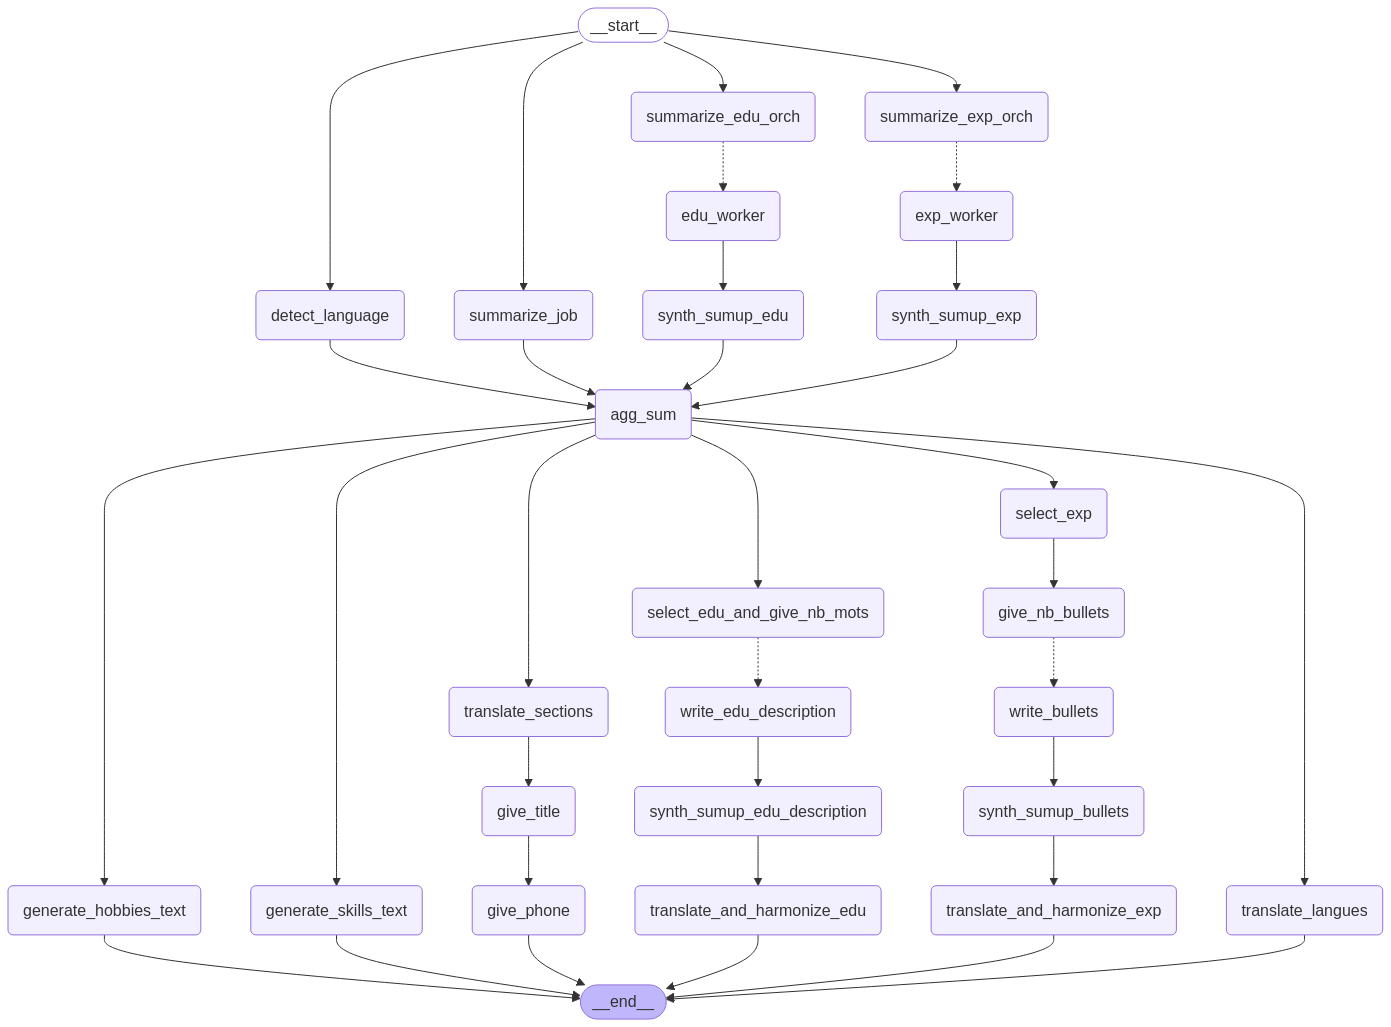

In [2]:
# Importer le graphe compilé pour la génération de CV
from ai_module.chains_gen_cv.gen_cv_chain import create_cv_chain
from IPython.display import Image, display

graph = create_cv_chain().compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
result = graph.invoke(cv_state)

